Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Santosh Dhungana"
ID = "st123415"

---

# Machine Learning Lab 04: Multinomial Logistic Regression


## Generalized Linear Models

From lecture, we know that members of the exponential family distributions can be written in the form
$$p(y;\eta) = b(y)e^{(\eta^\top T(y)-a(\eta))},$$
where
- $\eta$ is the natural parameter or canonical paramter of the distribution,
- $T(y)$ is the sufficient statistic (we normally use $T(y) = y$),
- $b(y)$ is an arbitrary scalar function of y, and
- $a(\eta)$ is the log partition function. We use $e^{a(\eta)}$ just to normalize the distribution to have a sum or integral of 1.

Each choice of $T$, $a$, and $b$ defines a family (set) of distributions parameterized by $\eta$.

If we can write $p(y \mid \mathbf{x} ; \theta)$ as a member of the exponential family of distributions with parameters $\mathbf{\eta}$ with
$\eta_i = \theta^\top_i \mathbf{x}$, we obtain a *generalized linear model* that can be optimized using the maximum likelihood principle.

The GLM for the Gaussian distribution with natural parameter $\eta$ being the mean of the Gaussian gives us ordinary linear regression.

The Bernoulli distribution with parameter $\phi$ can be written as an exponential distribution
with natural parmeter $\eta = \log \frac{\phi}{1-\phi}$. The GLM for this distribution is logistic regression.

When we write the multinomial distribution with paremeters $\phi_i > 0$ for classes $i \in 1..K$ with the constraint that
$$\sum_{i=1}^{K} \phi_i = 1$$ as a member of the exponential family,
the resulting GLM is called *multinomial logistic regression*. The parameters $\phi_1, \ldots, \phi_K$ are written
in terms of $\theta$ as
$$\phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$

## Optimizing a Multinomial Regression Model

In multinomial regression, we have

1. Data are pairs $\mathbf{x}^{(i)}, y^{(i)}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^n$ and
   $y \in 1..K$.
   
2. The hypothesis is a vector-valued function
$$\mathbf{h}_\theta(\mathbf{x}) = \begin{bmatrix} p(y = 1 \mid \mathbf{x} ; \theta) \\
                                         p(y = 2 \mid \mathbf{x} ; \theta) \\
                                         \vdots \\
                                         p(y = K \mid \mathbf{x} ; \theta) \end{bmatrix},$$
    where $$p(y = i \mid \mathbf{x}) = \phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$

We need a cost function and a way to minimize that cost function. As usual, we try to find the parameters maximizing the likelihood or log likelihood function, or equivalently, minimizing the negative log likelihood function:

$$\theta^* = \text{argmax}_\theta {\cal L}(\theta) =
             \text{argmax}_\theta \ell(\theta) =
             \text{argmin}_\theta J(\theta),$$
where
$$\begin{eqnarray}
   J(\theta) & = & - \ell(\theta) \\
   & = & - \sum_{i=1}^m \log p(y^{(i)} \mid \textbf{x}^{(i)} ; \theta).
   \end{eqnarray}$$

Now that we know what is $J(\theta)$, let's try to find its minimimum by taking the derivatives with respect to an arbitrary parameter $\theta_{kl}$, the $l$-th element of the parameter vector $\theta_k$ for class $k$. Before we start, let's define a variable $a_k$ as the linear activation for class $k$ in the softmax function:
$$ a_k = \theta_k^\top \mathbf{x}^{(i)}, $$
and rewrite the softmax more conveniently as
$$ \phi_k = \frac{e^{a_k}}{\sum_{j=1}^K e^{a_j}}. $$
That makes it a little easier to compute the gradient:
$$\begin{eqnarray}
   \frac{\partial J}{\partial \theta_{kl}} & = & - \sum_{i=1}^m \frac{1}{\phi_{y^{(i)}}} \frac{\partial \phi_{y^{(i)}}}{\partial \theta_{kl}}. \\
   \end{eqnarray}$$
Using the chain rule, we have
$$\frac{\partial \phi_{y^{(i)}}}{\partial \theta_{kl}} = \sum_{j=1}^K \frac{\partial \phi_{y^{(i)}}}{\partial a_j} \frac{\partial a_j}{\partial \theta_{kl}}$$
The second factor is easy:
$$ \frac{\partial a_j}{\partial \theta_{kl}} = \delta(k=j)x^{(i)}_l. $$
For the first factor, we have
$$\begin{eqnarray}
\frac{\partial \phi_{y^{(i)}}}{\partial a_j}
& = & \frac{ \left[ \delta(y^{(i)}=j)e^{a_j} \sum_{c=1}^K e^{a_c} \right] - e^{a_j} e^{a_j} }{\left[ \sum_{c=1}^K e^{a_c} \right]^2} \\
& = & \delta(y^{(i)}=j) \phi_j - \phi_j^2
\end{eqnarray}$$

Substituting what we've derived into the definition above, we obtain
$$ \frac{\partial J}{\theta_{kl}} = - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \frac{\partial a_j}{\partial \theta_{kl}}. $$

There are two ways to do the calculation.
In deep neural networks with multinomial outputs, we want to first calculate the $\frac{\partial J}{\partial a_j}$ terms then use them to calculate $\frac{\partial J}{\partial \theta_{kl}}$.

However, if we only have the "single layer" model described up till now, we note
that
$$\frac{\partial a_j}{\partial \theta_{kl}} = \delta(j=k) x^{(i)}_l,$$
so we can simplify as follows:
$$\begin{eqnarray}
  \frac{\partial J}{\theta_{kl}} & = & - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \frac{\partial a_j}{\partial \theta_{kl}} \\
  & = & - \sum_{i=1}^m \sum_{j=1}^K (\delta(y^{(i)}=j) - \phi_j) \delta(j=k) x^{(i)}_l \\
  & = & - \sum_{i=1}^m (\delta(y^{(i)}=k) - \phi_k) x^{(i)}_l \\
  \end{eqnarray}$$

## Put It Together

OK! Now we have all 4 criteria for our multinomial regression model:

1. Data are pairs $\mathbf{x}^{(i)}, y^{(i)}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^n$ and
   $y \in 1..K$.
   
2. The hypothesis is a vector-valued function
$$\mathbf{h}_\theta(\mathbf{x}) = \begin{bmatrix} p(y = 1 \mid \mathbf{x} ; \theta) \\
                                         p(y = 2 \mid \mathbf{x} ; \theta) \\
                                         \vdots \\
                                         p(y = K \mid \mathbf{x} ; \theta) \end{bmatrix},$$
    where $$p(y = i \mid \mathbf{x}) = \phi_i = p(y = i \mid \mathbf{x}; \theta) = \frac{e^{\theta^\top_i \mathbf{x}}}{\sum_{j=1}^{K}e^{\theta^\top_j \mathbf{x}}}. $$
    
3. The cost function is
   $$J(\theta) = - \sum_{i=1}^m \log p(y^{(i)} \mid \textbf{x}^{(i)})$$
   
4. The optimization algorithm is gradient descent on $J(\theta)$ with the update rule
   $$\theta_{kl}^{(n+1)} \leftarrow \theta_{kl}^{(n)} - \alpha \sum_{i=1}^m (\delta(y^{(i)}=k) - \phi_k) x^{(i)}_l.$$


## Multinomial Regression Example

The following example of multinomial logistic regression is from [Kaggle](https://www.kaggle.com/saksham219/softmax-regression-for-iris-classification).

The data set is the famous [Iris dataset from the UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/iris).

The data contain 50 samples from each of three classes. Each class refers to a particular species of the iris plant. 
The data include four independent variables:
1. Sepal length in cm
2. Sepal width in cm
3. Petal length in cm
4. Petal width in cm

The target takes on one of three classes:
1. Iris Setosa
2. Iris Versicolour
3. Iris Virginica
   
To predict the target value, we use multinomial logistic regression for $k=3$ classes i.e. $y \in \{ 1, 2, 3 \}$. 

Given $\mathbf{x}$, we would like to predict a probability distribution over the
three outcomes for $y$, i.e., $\phi_1 = p(y=1 \mid \mathbf{x})$, $\phi_2 = p(y=2 \mid \mathbf{x})$, and $\phi_3 = p(y=3 \mid \mathbf{x})$.


In [2]:
# importing libraries
import numpy as np
import pandas as pd 
import random
import math

The `phi` function returns $\phi_i$ for input patterns $\mathtt{X}$ and parameters $\theta$.

In [3]:
def phi(i, theta, X, num_class):
    """
    Here is how to make documentation for your function show up in intellisense.
    Explanation you put here will be shown when you use it.
    
    To get intellisense in your Jupyter notebook:
        - Press 'TAB' after typing a dot (.) to see methods and attributes
        - Press 'Shift+TAB' after typing a function name to see its documentation

    The `phi` function returns phi_i = h_theta(x) for input patterns X and parameters theta.
    
    Inputs:
        i=index of phi
        
        X=input dataset
        
        theta=parameters

    Returns:
        phi_i
    """
    mat_theta = np.matrix(theta[i])
    mat_x = np.matrix(X)
    num = math.exp(np.dot(mat_theta, mat_x.T))
    den = 0
    for j in range(0,num_class):
        mat_theta_j = np.matrix(theta[j])
        den = den + math.exp(np.dot(mat_theta_j, mat_x.T))
    phi_i = num / den
    return phi_i

**Tips for using intellisense: Shift+TAB**

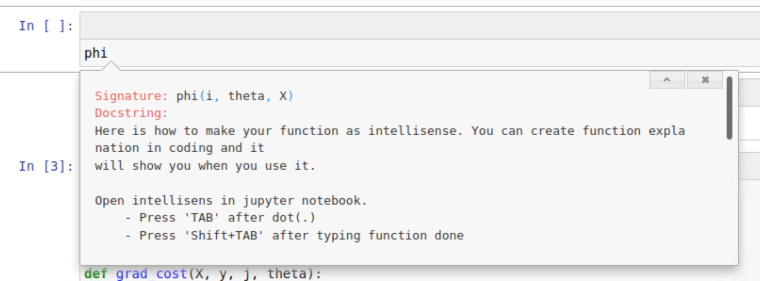

The `grad_cost` function gives the gradient of the cost for data $\mathtt{X}, \mathbf{y}$ for class $j\in 1..k$.

In [4]:
def indicator(i, j):
    '''
    Check whether i is equal to j
    
    Return:
        1 when i=j, otherwise 0
    '''
    if i == j: return 1
    else: return 0


def grad_cost(X, y, j, theta, num_class):
    '''
    Compute the gradient of the cost function for data X, y for parameters of
    output for class j in 1..k
    '''
    m, n = X.shape
    sum = np.array([0 for i in range(0,n)])
    for i in range(0, m):
        p = indicator(y[i], j) - phi(j, theta, X.loc[i], num_class)
        sum = sum + (X.loc[i] * p)
    grad = -sum / m
    return grad

def gradient_descent(X, y, theta, alpha, iters, num_class):
    '''
    Perform iters iterations of gradient descent: theta_new = theta_old - alpha * cost
    '''
    n = X.shape[1]
    for iter in range(iters):
        dtheta = np.zeros((num_class, n))
        for j in range(0, num_class):
            dtheta[j,:] = grad_cost(X, y, j, theta, num_class)
        theta = theta - alpha * dtheta
    return theta

def h(X, theta, num_class):
    '''
    Hypothesis function: h_theta(X) = theta * X
    '''
    X = np.matrix(X)
    h_matrix = np.empty((num_class,1))
    den = 0
    for j in range(0, num_class):
        den = den + math.exp(np.dot(theta[j], X.T))
    for i in range(0,num_class):
        h_matrix[i] = math.exp(np.dot(theta[i], X.T))
    h_matrix = h_matrix / den
    return h_matrix

## Exercise 1.1 (5 points)

Create a function to load **data** from **Iris.csv** using the Pandas library and extract y from the data.

You can use [the Pandas 10 minute guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) to learn how to use pandas.

In [5]:
def load_data(file_name, drop_label, y_label, is_print=False):
    # 1. Load csv file
    data = pd.read_csv(file_name)
    if is_print:
        print(data.head())
    # 2. remove 'Id' column from data
    if drop_label is not None:
        data = data.drop([drop_label],axis=1)
        if is_print:
            print(data.head())
    # 3. Extract y_label column as y from data
    y = data[y_label]
    # 4. get index of y-column
    y_index = data.columns.get_loc(y_label)
    # 5. Extrack X features from data
    X = data.drop(y_label, axis=1)
    # YOUR CODE HERE
    #raise NotImplementedError()
    return X, y

In [6]:
X, y = load_data('Iris.csv', 'Id', 'Species', True)
print(X.head())
print(y[:5])

# Test function: Do not remove
# tips: this is how to create dataset using pandas
d_ex = {'ID':     [  1,   2,   3,    4,    5,    6,    7],
        'Grade':  [3.5, 2.5, 3.0, 3.75, 2.83, 3.95, 2.68],
        'Type':   ['A', 'B', 'C',  'A',  'C',  'A',  'B']
        }
df = pd.DataFrame (d_ex, columns = ['ID','Grade', 'Type'])
df.to_csv('out.csv', index=False)

Xtest, ytest = load_data('out.csv', 'ID', 'Type')
assert len(Xtest.columns) == 1, 'number of X_columns incorrect (1)'
assert ytest.name == 'Type', 'Extract y_column is incorrect (1)'
assert ytest.shape == (7,), 'number of y is incorrect (1)'
assert 'Grade' in Xtest.columns, 'Incorrect columns in X (1)'
Xtest, ytest = load_data('out.csv', None, 'Type')
assert len(Xtest.columns) == 2, 'number of X_columns incorrect (2)'
assert ytest.name == 'Type', 'Extract y_column is incorrect (2)'
assert ytest.shape == (7,), 'number of y is incorrect (2)'
assert 'Grade' in Xtest.columns and 'ID' in Xtest.columns, 'Incorrect columns in X (2)'
import os
os.remove('out.csv')

assert len(X.columns) == 4, 'number of X_columns incorrect (3)'
assert 'SepalWidthCm' in X.columns and 'Id' not in X.columns and 'Species' not in X.columns, 'Incorrect columns in X (3)'
assert y.name == 'Species', 'Extract y_column is incorrect (3)'
assert y.shape == (150,), 'number of y is incorrect (3)'

print("success!")
# End Test function

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5          

**Expected result**: \
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm \
0            5.1           3.5            1.4           0.2\
1            4.9           3.0            1.4           0.2\
2            4.7           3.2            1.3           0.2\
3            4.6           3.1            1.5           0.2\
4            5.0           3.6            1.4           0.2\
0    Iris-setosa\
1    Iris-setosa\
2    Iris-setosa\
3    Iris-setosa\
4    Iris-setosa\
Name: Species, dtype: object

## Exercise 1.2 (10 points)

Partition data into training and test sets
- No need to use random.seed function!
- Ensure that the train set is 70% and the test set is 30% of the data.
- Encode the labels in the y attribute to be integers in the range 0..k-1.

<details>
    <summary><font size="3" color="green"><b>Hint:</b></font></summary>
    You can use the <tt>partition</tt> function from lab02 if you like
    <p></p>
    <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html">panda.iloc</a> must be used to extract data from an index list
    <p></p>
    <a href="https://pandas.pydata.org/docs/reference/api/pandas.unique.html">panda.unique</a> will give you the set of unique labels
</details>

In [7]:
import random
def partition(X, y, percent_train):
    # 1. create index list
    idx= np.arange(0, y.shape[0])
    
    # 2. shuffle index
    random.shuffle(idx)
    # 3. Create train/test index
    train_idx = idx[0: int(len(idx)*percent_train)]
    test_idx = idx[len(train_idx):]
    # 4. Separate X_Train, y_train, X_test, y_test
    X_train = X.loc[train_idx,:].reset_index().drop('index', axis=1)
   
    
    X_test = X.loc[test_idx,:].reset_index().drop('index', axis=1)
    
    # 5. Get y_labels_name from y using pandas.unique function
    y_labels = pd.unique(y)
    # 6. Change y_labels_name into string number and put into y_labels_new
    y_labels_num = {y_lab : i for i, y_lab in enumerate(y_labels)}
    y = y.apply(lambda x: y_labels_num.get(x) if x in y_labels_num else x)
    y_train = y.iloc[train_idx].reset_index(drop=True)#.drop('index', axis=1)
    y_test = y.iloc[test_idx].reset_index(drop=True)#.drop('index', axis=1)
    # 7. Drop shuffle index columns
    #     - pandas.reset_index() and pandas.drop(...) might be help
    
    y_labels_name = y_labels
    y_labels_new = pd.unique(y)
    
    # YOUR CODE HERE
    #raise NotImplementedError()
    
    return idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new

In [8]:
percent_train = 0.7
idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new = partition(X, y, percent_train)
print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)
print('y_train.shape', y_train.shape)
print('y_test.shape', y_test.shape)
print('y_labels_name: ', y_labels_name)
print('y_labels_new: ', y_labels_new)
print(X_train.head())
print(y_train.head())

# Test function: Do not remove
assert len(y_labels_name) == 3 and len(y_labels_new) == 3, 'number of y uniques are incorrect'
assert X_train.shape == (105, 4), 'Size of X_train is incorrect'
assert X_test.shape == (45, 4), 'Size of x_test is incorrect'
assert y_train.shape == (105, ), 'Size of y_train is incorrect'
assert y_test.shape == (45, ), 'Size of y_test is incorrect'
assert 'Iris-setosa' in y_labels_name and 'Iris-virginica' in y_labels_name and \
        'Iris-versicolor' in y_labels_name, 'y unique data incorrect'
assert min(y_labels_new) == 0 and max(y_labels_new) < 3, 'label indices are incorrect'

print("success!")
# End Test function

X_train.shape (105, 4)
X_test.shape (45, 4)
y_train.shape (105,)
y_test.shape (45,)
y_labels_name:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
y_labels_new:  [0 1 2]
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.0           3.3            1.4           0.2
1            5.4           3.4            1.7           0.2
2            6.9           3.1            4.9           1.5
3            5.1           3.8            1.9           0.4
4            5.7           2.5            5.0           2.0
0    0
1    0
2    1
3    0
4    2
Name: Species, dtype: int64
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
X_train.shape (105, 4)\
X_test.shape (45, 4)\
y_train.shape (105,)\
y_test.shape (45,)\
y_labels_name:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] \
y_labels_new:  [0, 1, 2]

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm\
0            6.4           2.8            5.6           2.2\
1            6.7           3.3            5.7           2.1\
2            4.6           3.4            1.4           0.3\
3            5.1           3.8            1.5           0.3\
4            5.0           2.3            3.3           1.0\
   Species\
0        2\
1        2\
2        0\
3        0\
4        1

## Exercise 1.3 (5 points)

Train your classification model using the `gradient_descent` function already provided.
You might also play around with the gradient descent function to see if you can speed it up!

In [9]:
# num_class is the number of unique labels
num_class = len(y_labels_name)

if (X_train.shape[1] == X.shape[1]): 
    X_train.insert(0, "intercept", 1)

# Reset m and n for training data
r, c = X_train.shape

# Initialize theta for each class
theta_initial = np.ones((num_class, c))

alpha = .05
iterations = 200

theta = gradient_descent(X_train, y_train, theta_initial, alpha, iterations, num_class)
# Logistic regression

# YOUR CODE HERE
#raise NotImplementedError()

In [10]:
print(theta)
print(theta.shape)

# Test function: Do not remove
assert theta.shape == (3, 5), 'Size of theta is incorrect'

print("success!")
# End Test function

[[ 1.18048637  1.32677232  1.81155648 -0.18599898  0.4409085 ]
 [ 1.05926294  1.19128563  0.68937889  1.18919108  0.81575004]
 [ 0.76025069  0.48194205  0.49906463  1.9968079   1.74334146]]
(3, 5)
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
[[ 1.17632192  1.32360047  1.83204165 -0.20224445  0.44039155]\
 [ 1.10140069  1.13537321  0.74833178  1.21907866  0.82567377]\
 [ 0.72227738  0.54102632  0.41962657  1.98316579  1.73393467]]\
\
(3, 5)

## Exercise 1.4 (5 points)

Let's get your model to make predictions on the test data.

In [11]:
# Prediction on test data 

if (X_test.shape[1] == X.shape[1]): 
    X_test.insert(0, "intercept", 1)

# Reset m and n for test data
r,c = X_test.shape

y_pred = []
for index,row in X_test.iterrows(): # get a row of X_test data
    # calculate y_hat using hypothesis function
    y_hat = h(row, theta, num_class)
    # find the index (integer value) of maximum value in y_hat and input back to prediction
    prediction = int(np.argmax(y_hat))
    # YOUR CODE HERE
    #raise NotImplementedError()
    # collect the result
    y_pred.append(prediction)

In [12]:
print(len(y_pred))
print(y_pred[:7])
print(type(y_pred[0]))

# Test function: Do not remove
assert len(y_pred) == 45, 'Size of y_pred is incorrect'
assert isinstance(y_pred[0], int) and isinstance(y_pred[15], int) and isinstance(y_pred[17], int), 'prediction type is incorrect'
assert max(y_pred) < 3 and min(y_pred) >= 0, 'wrong index of y_pred'

print("success!")
# End Test function

45
[2, 0, 1, 1, 0, 1, 1]
<class 'int'>
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
45 \
[2, 0, 2, 0, 0, 0, 2] \
<class 'int'>

## Exercise 1.5 (5 points)

Estimate accuracy of model on test data

$$\text{accuracy} = \frac{\text{number of correct test predictions}}{m_{\text{test}}}$$

In [13]:
def calc_accuracy(y_test, y_pred):
    accuracy = np.count_nonzero([y_test == y_pred])/y_test.shape[0]
    # YOUR CODE HERE
    #raise NotImplementedError()
    return accuracy

In [14]:
y_test

0     2
1     0
2     1
3     1
4     0
5     1
6     1
7     1
8     1
9     0
10    0
11    2
12    2
13    2
14    2
15    2
16    0
17    1
18    0
19    1
20    0
21    0
22    0
23    2
24    0
25    0
26    2
27    2
28    1
29    0
30    2
31    1
32    1
33    2
34    1
35    0
36    1
37    0
38    2
39    0
40    1
41    0
42    2
43    1
44    1
Name: Species, dtype: int64

In [15]:
accuracy = calc_accuracy(y_test, y_pred)
print('Accuracy: %.4f' % accuracy)

# Test function: Do not remove
assert isinstance(accuracy, float), 'accuracy should be floating point'
assert accuracy >= 0.8, 'Did you train the data?'

print("success!")
# End Test function

Accuracy: 0.9778
success!


**Expected result**: should be at least 0.8!

## On your own in lab

We will do the following in lab:
1. Write a function to obtain the cost for particular $\mathtt{X}$, $\mathbf{y}$, and $\theta$.
2. Plot the training set and test cost as training goes on and find the best value for the number of iterations and learning rate.
3. Make 2D scatter plots showing the predicted and actual class of each item in the training set, plotting two features at a time.
   Comment on the cause of the errors you observe. If you obtain perfect test set accuracy, re-run the train/test split
   and rerun the optimization until you observe some mistaken predictions on the test set.


## Exercise 2.1 (15 points)

1. Write a function to obtain the cost for particular $\mathtt{X}$, $\mathbf{y}$, and $\theta$.
   Name your function `my_J()` and implement

$$ J_j = -\delta(y, j)\log{\phi_j} $$


In [16]:
def my_J(theta, X, y, j, num_class):
    cost = -(indicator(y, j)*np.log(phi(j, theta, X, num_class)))
    # YOUR CODE HERE
    #raise NotImplementedError()
    return cost

In [17]:
# Test function: Do not remove
m, n = X_train.shape
test_theta = np.ones((3, n))  
cost = my_J(test_theta, X_train.loc[10], y_train[10], 0, 3)
assert isinstance(cost, float), 'cost should be floating point'

print("success!")
# End Test function

success!


2. Implement <code>my_grad_cost</code> using your <code>my_J</code> function

In [18]:
def my_grad_cost(X, y, j, theta, num_class):
    m, n = X.shape
    cost = 0
    sum_ = np.array([0 for i in range(0,n)])
    for i in range(0, m):
        p = indicator(y[i], j) - phi(j, theta, X.loc[i], num_class)
        c = my_J(theta, X.iloc[i], y.iloc[i], j, num_class)
        sum_ = sum_ + (X.loc[i] * p)
        cost = cost + c
    
    grad = -sum_ / m
    #raise NotImplementedError()
    return grad, cost

In [19]:
# Test function: Do not remove
m, n = X_train.shape
test_theta = np.ones((3, n))  
grad, cost = my_grad_cost(X_train, y_train, 0, test_theta, num_class)
print(grad)
print(cost)
assert isinstance(cost, float), 'cost should be floating point'
assert isinstance(grad['intercept'], float) and \
        isinstance(grad['SepalLengthCm'], float) and \
        isinstance(grad['SepalWidthCm'], float) and \
        isinstance(grad['PetalLengthCm'], float) and \
        isinstance(grad['PetalWidthCm'], float) , 'grad should be floating point'
print("success!")
# End Test function

intercept        0.009524
SepalLengthCm    0.348571
SepalWidthCm    -0.074603
PetalLengthCm    0.801587
PetalWidthCm     0.334286
dtype: float64
37.352817814715735
success!


**Expect result**: <span style="color:blue">(*or similar*)</span>\
intercept        0.009524\
SepalLengthCm    0.316825\
SepalWidthCm    -0.091429\
PetalLengthCm    0.780000\
PetalWidthCm     0.329524\
dtype: float64\
37.352817814715735

3. Implement <code>my_gradient_descent</code> using your <code>my_grad_cost</code> function

In [20]:
def my_gradient_descent(X, y, theta, alpha, iters, num_class):        
    cost_arr = []
    # YOUR CODE HERE
    n = X.shape[1]
    for i in range(iters):
        cost = 0
        dtheta = np.zeros((num_class, n))
        for j in range(0, num_class):
            dtheta[j,:] , c = my_grad_cost(X, y, j, theta, num_class)
            cost = cost + c
        cost_arr.append(cost)
        theta = theta - alpha * dtheta
    #raise NotImplementedError()
    return theta, cost_arr

In [21]:
# Test function: Do not remove
m, n = X_train.shape
test_theta = np.ones((3, n))  
theta, cost = my_gradient_descent(X_train, y_train, theta_initial, 0.001, 5, 3)
print(theta)
print(cost)
print("success!")
# End Test function

[[0.99996962 0.99836312 1.00042454 0.99606904 0.9983542 ]
 [0.999952   0.99996866 0.99942919 1.00065109 1.00014179]
 [1.00007838 1.00166823 1.00014626 1.00327987 1.00150401]]
[115.35429031015153, 115.18911163394037, 115.02813182000722, 114.87117749566221, 114.71808251103252]
success!


**Expected result**: <span style="color:blue">(*or similar*)</span>\
[[1.00001186 0.99618853 1.00183642 0.9889817  0.99528923]\
 [1.00009697 1.0011823  0.99883395 1.00316763 1.00083055]\
 [0.99987915 1.00255606 0.99929351 1.00779768 1.00386218]]\
[114.00099216453735, 113.89036233839263, 113.78163144339288, 113.67472269747496, 113.56956268162737]\
37.352817814715735

## Exercise 2.2 (20 points)

4. Plot the training set and test cost as training goes on and find the best value for the number of iterations and learning rate.
5. Make 2D scatter plots showing the predicted and actual class of each item in the training set, plotting two features at a time.
   Comment on the cause of the errors you observe. If you obtain perfect test set accuracy, re-run the train/test split
   and rerun the optimization until you observe some mistaken predictions on the test set.

In [22]:
import matplotlib.pyplot as plt

In [23]:
theta_arr = []
cost_arr = []
accuracy_arr = []

# design your own learning rate and num iterations
alpha_arr = np.array([0.009, 0.01, 0.05, 0.09])
iterations_arr = np.array([200, 200, 200, 200])


def prediction(X, theta):
    y_pred = []
    
    for index,row in X.iterrows(): # get a row of X_test data
        # calculate y_hat using hypothesis function
        y_hat = h(row, theta, num_class)
        # find the index (integer value) of maximum value in y_hat and input back to prediction
        result = int(np.where(y_hat == np.amax(y_hat))[0])
        prediction = result

        # collect the result
        y_pred.append(prediction)
    return y_pred

# YOUR CODE HERE
#raise NotImplementedError()
for i in range(alpha_arr.shape[0]):
    theta, cost= my_gradient_descent(X_train, y_train, theta_initial, alpha_arr[i], iterations_arr[i], num_class)
    theta_arr.append(theta)
    cost_arr.append(cost)
    y_pred= prediction(X_test, theta)
    accuracy = calc_accuracy(y_test, y_pred)
    accuracy_arr.append(accuracy)
    


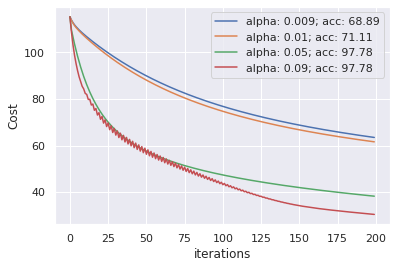

In [24]:
# plot
import seaborn as sns
sns.set(style='darkgrid')
for i in range(alpha_arr.shape[0]):
    plt.plot(cost_arr[i], label = 'alpha: {0}; acc: {1}'.format(alpha_arr[i], round(accuracy_arr[i]*100,2)))
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.legend()


**Expected result**: <span style="color:blue">(*Yours doesn't have to be the same!*)</span>

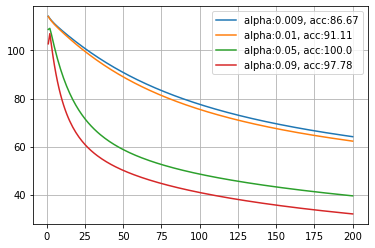

Accuracy is => 0.9619047619047619
   intercept  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0          1            5.0           3.3            1.4           0.2
1          1            5.4           3.4            1.7           0.2
2          1            6.9           3.1            4.9           1.5
3          1            5.1           3.8            1.9           0.4
4          1            5.7           2.5            5.0           2.0
SepalLengthCm SepalWidthCm
SepalLengthCm PetalLengthCm
SepalLengthCm PetalWidthCm
PetalLengthCm SepalWidthCm
PetalLengthCm PetalWidthCm
SepalWidthCm PetalWidthCm


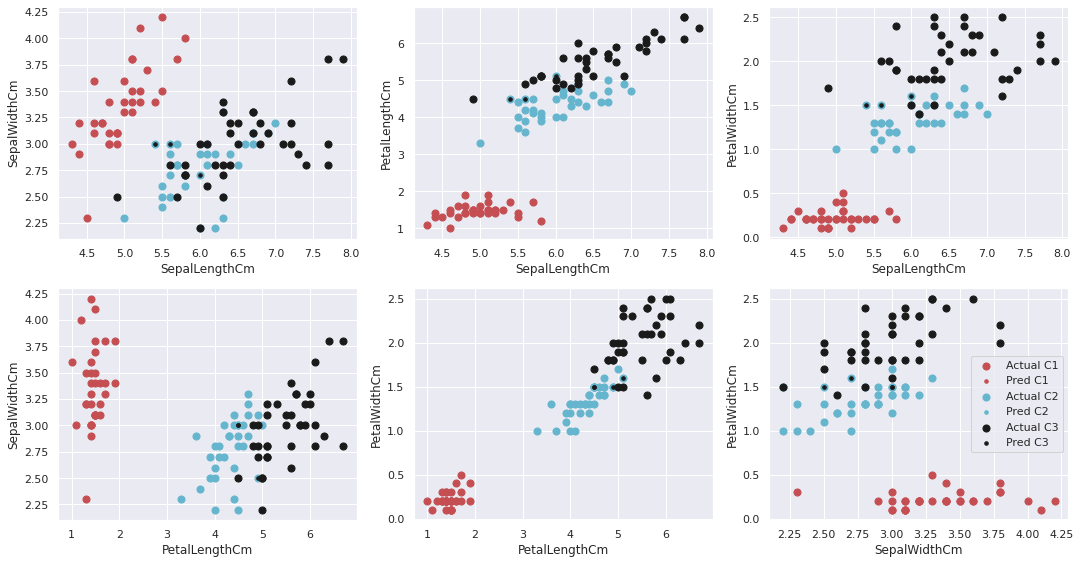

In [25]:


y_pred = prediction(X_train, theta)                                                                                                                                                                       
y_pred_df = pd.Series(y_pred)
accuracy = calc_accuracy(y_train, y_pred)
print("Accuracy is =>", accuracy)
print(X_train.head())

# create the dataframe housing x_train, y_train and y_predicted
scplot_df =pd.concat([X_train, y_train, y_pred_df], axis=1).rename({'Species':'y', 0:'y_pred'}, axis=1)
scplot_df

colors=['r', 'c', 'k']

plot_axes = [('SepalLengthCm', 'SepalWidthCm'), ('SepalLengthCm', 'PetalLengthCm'), ('SepalLengthCm', 'PetalWidthCm'), ('PetalLengthCm', 'SepalWidthCm'), ('PetalLengthCm', 'PetalWidthCm'),('SepalWidthCm', 'PetalWidthCm')]


fig, axes= plt.subplots(2, 3, figsize=(15,8))

for j, ax in enumerate(axes.flatten()):
   # print(len(plot_axes))
    if j<=len(plot_axes)-1:
        l, w = plot_axes[j]
        print(l, w)
    else:
        ax.set_visible(False)
    for i in range (len(pd.unique(y_pred))):
        df= scplot_df[scplot_df.y==i]
        df2= scplot_df[scplot_df.y_pred==i]
        ax.scatter(df.loc[:,l], df.loc[:, w], s=50, c=colors[i], marker='o', label='Actual C'+str(i+1))
        ax.scatter(df2.loc[:, l], df2.loc[:, w], s=50, marker='.', c=colors[i], label='Pred C'+str(i+1))
    ax.set_xlabel(l)
    ax.set_ylabel(w)
plt.legend()
plt.tight_layout()
#del axes[-1, -1]


The confusion seems to be between Class 2 (Iris-versicolor) and Class 3 (Iris-virginica) indicating that Sepal length and width seems to be similar to the Petal length and width for these classes compared to Class 1 (Iris-setosa).

## On your own to take home

We see that the Iris dataset is pretty easy. Depending on the train/test split, we get 95-100% accuracy.

Find a more interesting multi-class classification problem on Kaggle (Tell the reference), clean the dataset to obtain numerical input features without missing values,
split the data into test and train, and experiment with multinomial logistic regression.

Write a brief report on your experiments and results. As always, turn in a Jupyter notebook by email
to the instructor and TA.


## My own dataset
I have used the Palmer archipelago antratica penguin data from kaggle accessed at https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data

In [26]:
# read dataset
X, y = load_data('penguins_size.csv', drop_label=None, y_label='species')
print('X-shape:', X.shape)
print('y-shape:', y.shape)

# Take a peek into data
print(X.head())
print(y.head())

X-shape: (344, 6)
y-shape: (344,)
      island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Torgersen              39.1             18.7              181.0   
1  Torgersen              39.5             17.4              186.0   
2  Torgersen              40.3             18.0              195.0   
3  Torgersen               NaN              NaN                NaN   
4  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: object


In [27]:
# check for missing data
X.isnull().sum()

island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [28]:
def fill_missing_categorical(data):        
    total_notnull = data.value_counts()
    null = data.isnull().sum()
    value0_ratio = total_notnull[0]/sum(total_notnull.values)
    v0_train = int(round(value0_ratio * null ))
    v1_train = int(null - v0_train)
    print('amount of value 0',v0_train)
    print('amount of value 1',v1_train)
    print('===============BEFORE THE FILLING========== /n')
    print(total_notnull)
    print('Elements in the column', total_notnull.shape)
    print('Ratio', value0_ratio)
    data.fillna(total_notnull.index[0], inplace = True, limit = v0_train)
    data.fillna(total_notnull.index[1], inplace = True, limit = v1_train)
    print('===============AFTER THE FILLING========== /n')
    total_notnull = data.value_counts()
    print(total_notnull)
    print('null values are', data.isnull().sum())
    #return data

In [29]:
fill_missing_categorical(X['sex'])


amount of value 0 5
amount of value 1 5
===============BEFORE THE FILLING========== /n
MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64
Elements in the column (3,)
Ratio 0.5029940119760479
===============AFTER THE FILLING========== /n
MALE      173
FEMALE    170
.           1
Name: sex, dtype: int64
null values are 0


In [30]:
# fill the missing values of numerical columns with mean values
for col in X.columns:
    if X[col].dtype!='O':
        mean_value = X[col].mean()
        print(col+':' + str (mean_value))
        X[col].fillna(value=mean_value, inplace=True)
        
    else:
        X[col]


culmen_length_mm:43.92192982456142
culmen_depth_mm:17.151169590643278
flipper_length_mm:200.91520467836258
body_mass_g:4201.754385964912


In [31]:
print(X.isnull().sum())

island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [32]:
# function to normalize the dataset
def normalized_data(data):
    means = np.mean(data, axis=0) #calculate the mean
    stds = np.std(data, axis=0) #calculate the std 
    data_norm = (data - means) / stds
    return data_norm

In [33]:
X_norm = normalized_data(X[['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']].astype(float))

In [34]:
# change categorical values with numerical values
genders = pd.unique(X['sex'])
islands = pd.unique(X['island'])
print(genders)
print(islands)



['MALE' 'FEMALE' '.']
['Torgersen' 'Biscoe' 'Dream']


In [35]:
X['sex']=X['sex'].apply(lambda g : 0 if g =='MALE' else 1) # since only one data set contains '.' it is replaced with 1
X['island']=X['island'].apply(lambda g : 0 if g=='Torgersen' else (1 if g=='Biscoe' else 2))

In [36]:
X['island'].head()

0    0
1    0
2    0
3    0
4    0
Name: island, dtype: int64

In [37]:
# now add numerical sex and island to the X-norm dataset
X_norm.insert(0, 'island', X.island)
X_norm.insert(5, 'sex', X.sex)
X_norm.insert(0, 'intercept', 1)
X_norm = X_norm.astype(float)

In [38]:
# print X_norm head to check the data
X_norm.head()

,intercept,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,0.0
1,1.0,0.0,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,1.0
2,1.0,0.0,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,1.0
3,1.0,0.0,1.307172e-15,1.806927e-15,0.000000,0.000000,0.0
4,1.0,0.0,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,1.0


In [39]:

percent_train = 0.7
idx, X_train, y_train, X_test, y_test, y_labels_name, y_labels_new = partition(X_norm, y, percent_train)

In [40]:
theta_arr = []
cost_arr = []
accuracy_arr = []


r, c = X_train.shape
num_class = len(np.unique(y))

# design your own learning rate and num iterations
alpha_arr = np.array([0.009, 0.01, 0.05, 0.09])
iterations_arr = np.array([100, 100, 100, 100])
theta_initial = np.ones((num_class, c))

def prediction(X, theta):
    y_pred = []
    
    for index,row in X.iterrows(): # get a row of X_test data
        # calculate y_hat using hypothesis function
        y_hat = h(row, theta, num_class)
        # find the index (integer value) of maximum value in y_hat and input back to prediction
        result = int(np.where(y_hat == np.amax(y_hat))[0])
        prediction = result

        # collect the result
        y_pred.append(prediction)
    return y_pred

# # YOUR CODE HERE
# #raise NotImplementedError()
for i in range(alpha_arr.shape[0]):
    print(i)
    theta, cost= my_gradient_descent(X_train, y_train, theta_initial, alpha_arr[i], iterations_arr[i], num_class)
    theta_arr.append(theta)
    cost_arr.append(cost)
    y_pred= prediction(X_test, theta)
    accuracy = calc_accuracy(y_test, y_pred)
    accuracy_arr.append(accuracy)

0
1
2
3


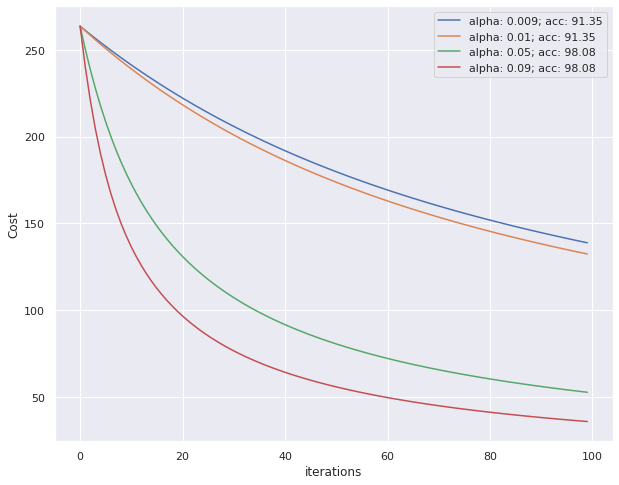

In [41]:
# plot the cost vs number of iterations for different alpha value along with accuracy
plt.figure(figsize=(10, 8))
for i in range(alpha_arr.shape[0]):
    plt.plot(cost_arr[i], label = 'alpha: {0}; acc: {1}'.format(alpha_arr[i], round(accuracy_arr[i]*100,2)))
plt.xlabel('iterations')
plt.ylabel('Cost')
plt.legend()


In [42]:
for i in theta_arr:
    y_pred = prediction(X_train, i)
    accuracy = calc_accuracy(y_train, y_pred)
    print(accuracy)

#theta_arr[3]

0.925
0.925
0.9833333333333333
0.9875


Accuracy is => 0.9875
   intercept  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0        1.0     2.0         -1.457382         0.380859          -0.779643   
1        1.0     1.0          1.007790        -0.687211           1.077465   
2        1.0     2.0         -1.181430         0.686022          -0.136798   
3        1.0     2.0         -0.611129         0.024835          -0.993924   
4        1.0     1.0         -1.126240         0.584301          -1.922478   

   body_mass_g  sex  
0    -0.941517  1.0  
1     0.905812  0.0  
2     0.342220  0.0  
3    -0.910207  0.0  
4    -1.004139  1.0  
culmen_length_mm culmen_depth_mm
culmen_length_mm flipper_length_mm
culmen_depth_mm flipper_length_mm
body_mass_g flipper_length_mm
culmen_depth_mm body_mass_g
culmen_length_mm body_mass_g
flipper_length_mm body_mass_g
culmen_length_mm sex
culmen_depth_mm sex


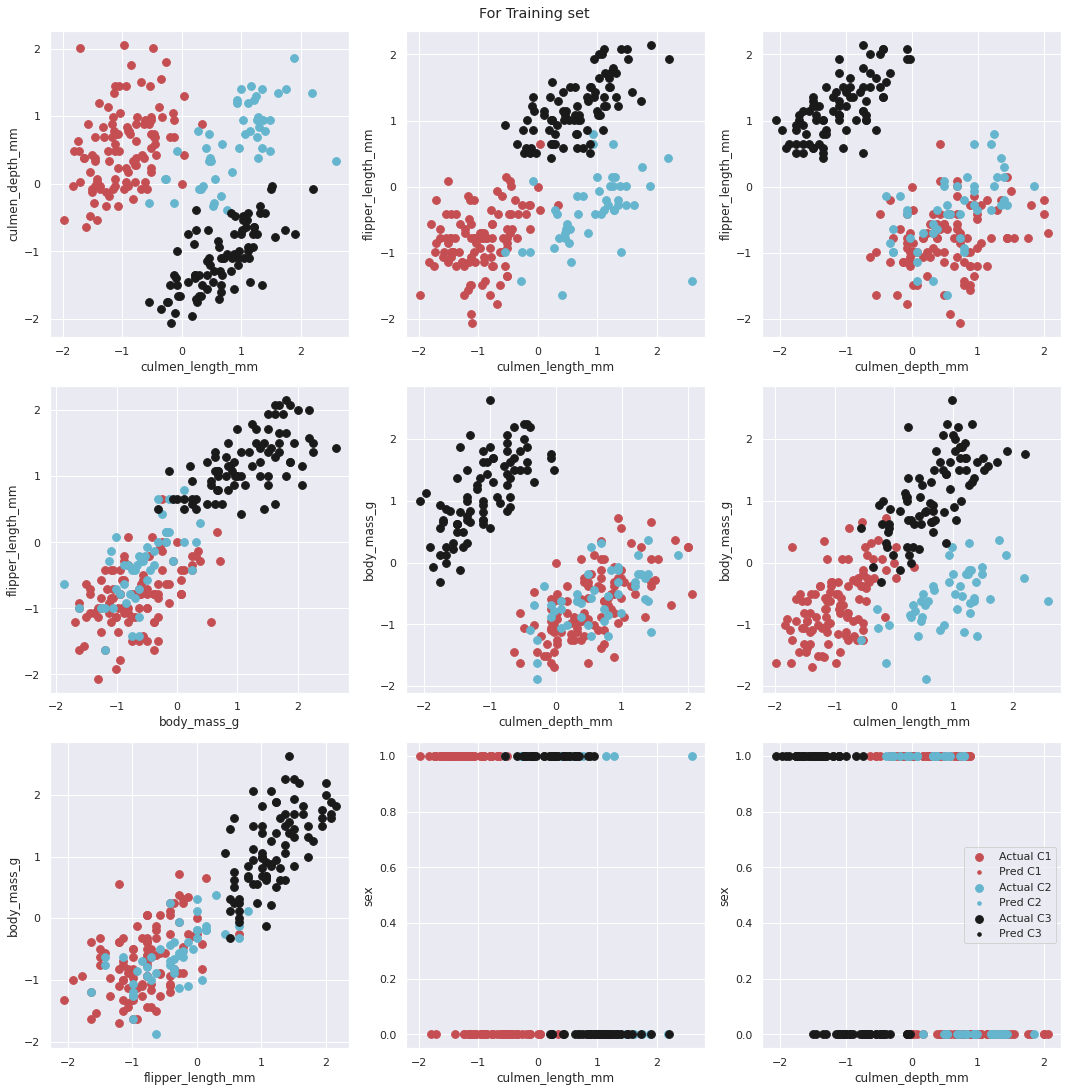

In [43]:
# plot scatter plots

y_pred = prediction(X_train, theta_arr[3])
y_pred_df = pd.Series(y_pred)
accuracy = calc_accuracy(y_train, y_pred)
print("Accuracy is =>", accuracy)
print(X_train.head())

# create the dataframe housing x_train, y_train and y_predicted
scplot_df =pd.concat([X_train, y_train, y_pred_df], axis=1).rename({'species':'y', 0:'y_pred'}, axis=1)
scplot_df

colors=['r', 'c', 'k']

plot_axes = [('culmen_length_mm', 'culmen_depth_mm'), ('culmen_length_mm', 'flipper_length_mm'), 
             ('culmen_depth_mm', 'flipper_length_mm'), ('body_mass_g', 'flipper_length_mm'), ('culmen_depth_mm', 'body_mass_g'),('culmen_length_mm', 'body_mass_g'),
            ('flipper_length_mm', 'body_mass_g'), ('culmen_length_mm', 'sex'), ('culmen_depth_mm', 'sex'), ('flipper_length_mm', 'sex')]


fig, axes= plt.subplots(3, 3, figsize=(15,15))

for j, ax in enumerate(axes.flatten()):
   # print(len(plot_axes))
    if j<=len(plot_axes)-1:
        l, w = plot_axes[j]
        print(l, w)
    else:
        ax.set_visible(False)
    for i in range (len(pd.unique(y_pred))):
        df= scplot_df[scplot_df.y==i]
        df2= scplot_df[scplot_df.y_pred==i]
        ax.scatter(df.loc[:,l], df.loc[:, w], s=60, c=colors[i], marker='o', label='Actual C'+str(i+1))
        ax.scatter(df2.loc[:, l], df2.loc[:, w], s=50, marker='.', c=colors[i], label='Pred C'+str(i+1))
    ax.set_xlabel(l)
    ax.set_ylabel(w)
plt.legend()
plt.suptitle('For Training set', y=1.01)
plt.tight_layout()

Accuracy is => 0.9807692307692307
   intercept  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0        1.0     2.0         -1.457382         0.380859          -0.779643   
1        1.0     1.0          1.007790        -0.687211           1.077465   
2        1.0     2.0         -1.181430         0.686022          -0.136798   
3        1.0     2.0         -0.611129         0.024835          -0.993924   
4        1.0     1.0         -1.126240         0.584301          -1.922478   

   body_mass_g  sex  
0    -0.941517  1.0  
1     0.905812  0.0  
2     0.342220  0.0  
3    -0.910207  0.0  
4    -1.004139  1.0  
culmen_length_mm culmen_depth_mm
culmen_length_mm flipper_length_mm
culmen_depth_mm flipper_length_mm
body_mass_g flipper_length_mm
culmen_depth_mm body_mass_g
culmen_length_mm body_mass_g


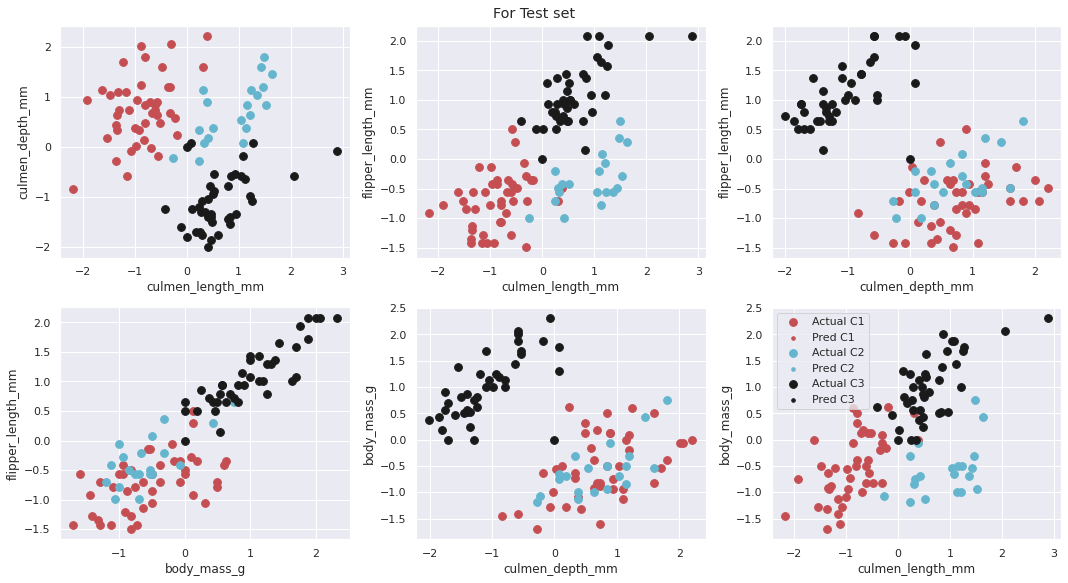

In [44]:
# plot scatter plots

y_pred = prediction(X_test, theta_arr[3])
y_pred_df = pd.Series(y_pred)
accuracy = calc_accuracy(y_test, y_pred)
print("Accuracy is =>", accuracy)
print(X_train.head())

# create the dataframe housing x_train, y_train and y_predicted
scplot_df =pd.concat([X_test, y_test, y_pred_df], axis=1).rename({'species':'y', 0:'y_pred'}, axis=1)
scplot_df

colors=['r', 'c', 'k']

plot_axes = [('culmen_length_mm', 'culmen_depth_mm'), ('culmen_length_mm', 'flipper_length_mm'), ('culmen_depth_mm', 'flipper_length_mm'), ('body_mass_g', 'flipper_length_mm'), ('culmen_depth_mm', 'body_mass_g'),('culmen_length_mm', 'body_mass_g')]


fig, axes= plt.subplots(2, 3, figsize=(15,8))

for j, ax in enumerate(axes.flatten()):
   # print(len(plot_axes))
    if j<=len(plot_axes)-1:
        l, w = plot_axes[j]
        print(l, w)
    else:
        ax.set_visible(False)
    for i in range (len(pd.unique(y_pred))):
        df= scplot_df[scplot_df.y==i]
        df2= scplot_df[scplot_df.y_pred==i]
        ax.scatter(df.loc[:,l], df.loc[:, w], s=60, c=colors[i], marker='o', label='Actual C'+str(i+1))
        ax.scatter(df2.loc[:, l], df2.loc[:, w], s=50, marker='.', c=colors[i], label='Pred C'+str(i+1))
    ax.set_xlabel(l)
    ax.set_ylabel(w)
plt.legend()
plt.suptitle('For Test set', y=1.01)
plt.tight_layout()

In this exercise , the penguin dataset with 3 classes of Penguin Adelie, Chinstrap  and Gentoo living across 3 different islands were analyzied. The data set contains 344 samples and 6 features. The dataset were normalized prior to training using multinominal regression. The alpha  value of 0.05 and 0.09 yielded the accuracy of 98.75 %.
In training dataset 98.75 % of accuracy was obtained while 98 % accuracy was obtained in the test dataset.

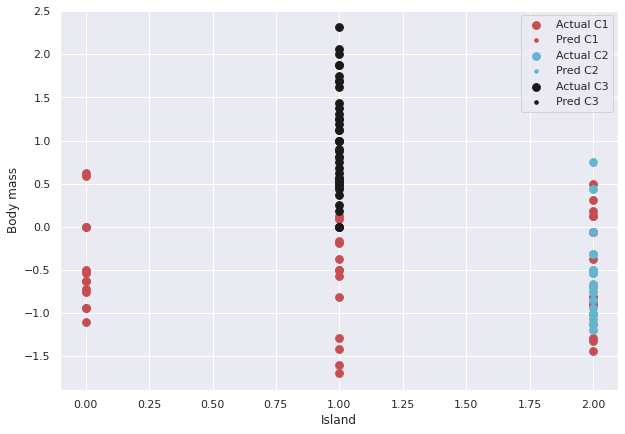

In [45]:
plt.figure(figsize=(10,7))
for i in range (len(pd.unique(y_pred))):
        
    df= scplot_df[scplot_df.y==i]
    df2= scplot_df[scplot_df.y_pred==i]
    plt.scatter(df.loc[:,'island'], df.loc[:, 'body_mass_g'], s=60, c=colors[i], marker='o', label='Actual C'+str(i+1))
    plt.scatter(df2.loc[:, 'island'], df2.loc[:, 'body_mass_g'], s=50, marker='.', c=colors[i], label='Pred C'+str(i+1))
plt.xlabel('Island')
plt.ylabel('Body mass')
plt.legend()

In [46]:
print(pd.unique(y))
print()

['Adelie' 'Chinstrap' 'Gentoo']



Class 1 (Adelie) are found in all islands while Class 2 (Chinstrap) lives in island 2 while class 2 lives in island 1.